In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import utilities
from violin import violin
from scatter import scatter
from lm import lm
from annotation import hTextLine

%load_ext autoreload
%autoreload 2

In [2]:
matplotlib = utilities.set_mpl_defaults(matplotlib)

# Make some data

In [3]:
np.random.seed(1)
variables = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data = pd.DataFrame({v: np.random.normal(loc=np.random.uniform(),
                                         scale=np.random.uniform(),
                                         size=50)
                     for v in variables})
data.columns.name = 'Group'

# Violin Plot

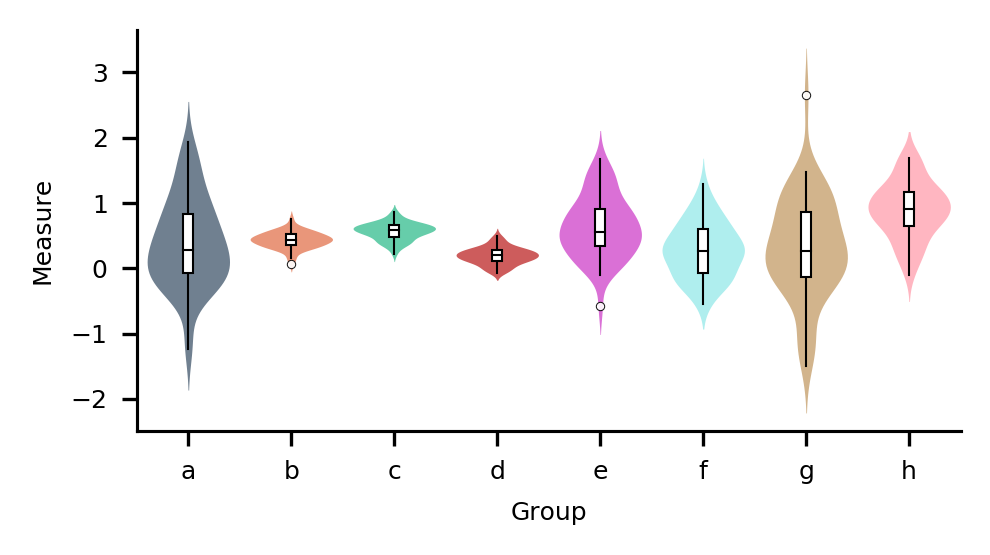

In [4]:
fig, ax = plt.subplots(dpi=300, figsize=utilities.cm2inch(9, 4.5))
ax = violin(data, 
            value_name='Measure',
            ax=ax)

# Scatter

Text(0.5, 1.0, 'Scatter plot')

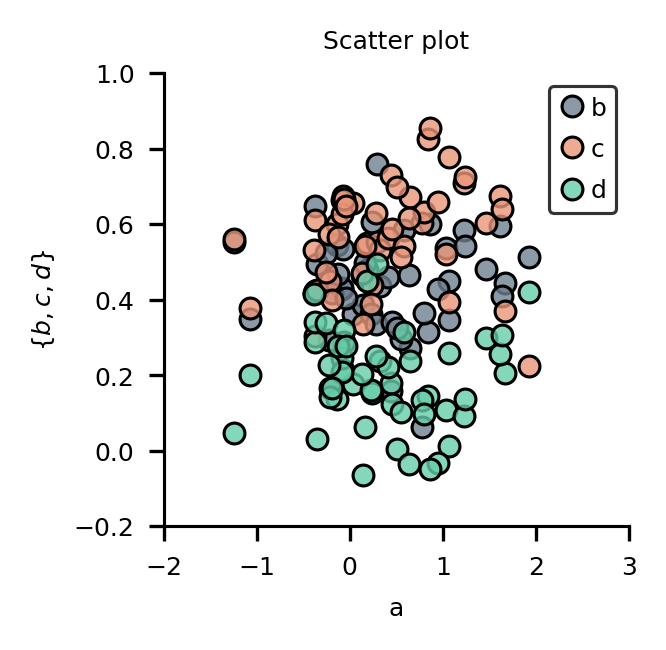

In [40]:
fig = plt.figure()

scatter(data['a'], data['b'], label='b')
scatter(data['a'], data['c'], label='c')
ax = scatter(data['a'], data['d'], label='d')
ax.set_xlabel('a')
ax.set_ylabel('$\{b, c, d\}$')
ax.legend()
ax.set_xlim(-2, 3)
ax.set_ylim(-0.2, 1)
ax.set_title('Scatter plot')

# Linear Model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 3236.16draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 2879.26draws/s]


Text(0, 0.5, 'Other')

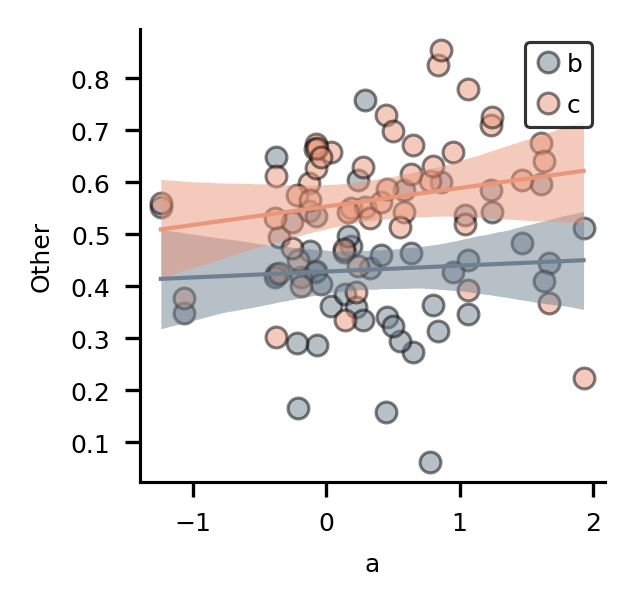

In [61]:
fig, ax = plt.subplots()
ax, trace_ab, summary_ab = lm(data['a'], data['b'], label='b')
ax, trace_ac, summary_ac = lm(data['a'], data['c'], label='c')
ax.legend()
ax.set_xlabel('a')
ax.set_ylabel('Other')

# Bar annotation

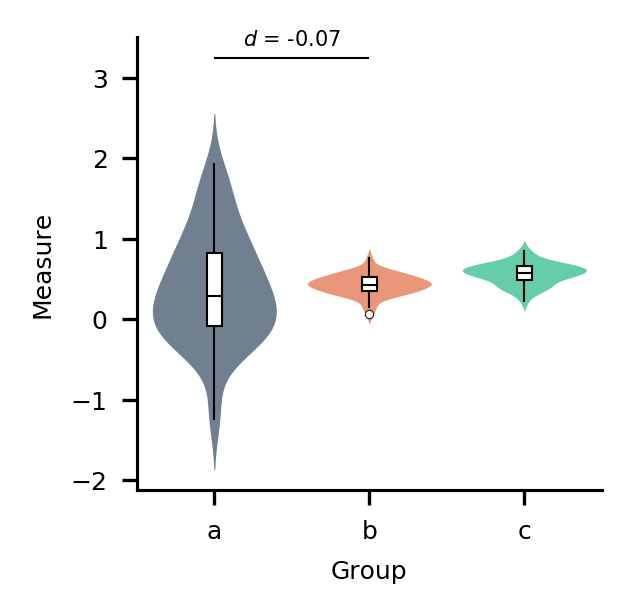

In [5]:
ax = violin(data[['a', 'b', 'c']], 
            value_name='Measure')

# Annotation
sd_pooled = np.sqrt(np.std(data['a'])**2 + np.std(data['b'])**2)
d = (np.mean(data['a']) - np.mean(data['b'])) / sd_pooled
ax = hTextLine(text='$d$ = {d:.2f}'.format(d=d),
               x0=0, x1=1, y=3.25, ax=ax)

# Axis labelling

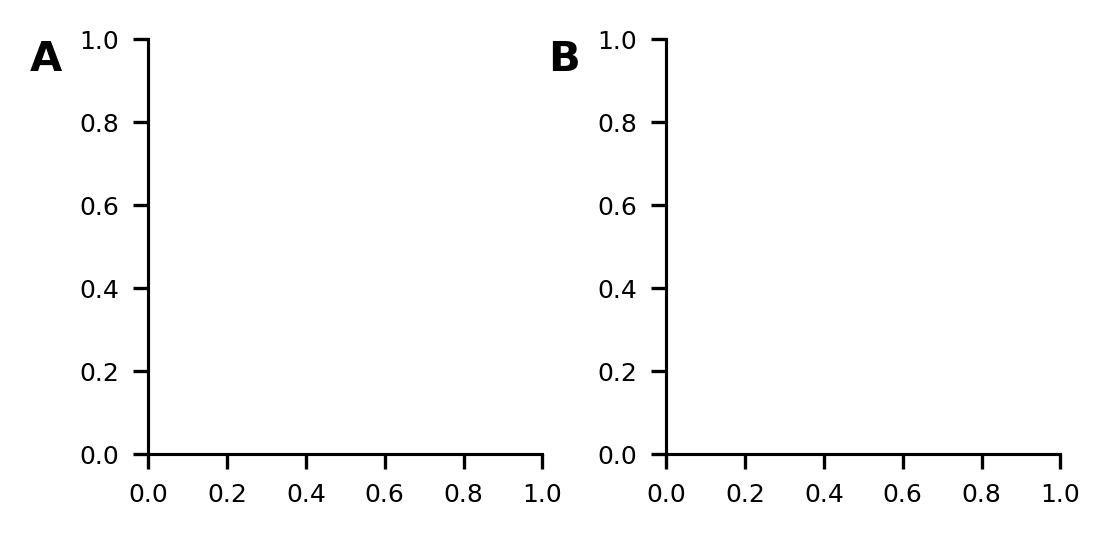

In [82]:
fig, axs = plt.subplots(1, 2, figsize=utilities.cm2inch(9, 4.5))

fig.tight_layout()
utilities.label_axes(fig, 
                     loc=(-0.3, 1.0), # in axis-fraction
                     labels=['A', 'B'], # defaults to lowercase if labels=NOne
                     va='top', fontsize=10, fontweight='bold')

# Everything together

In [63]:
from scipy.stats import ttest_ind

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1915.81draws/s]
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1836.79draws/s]


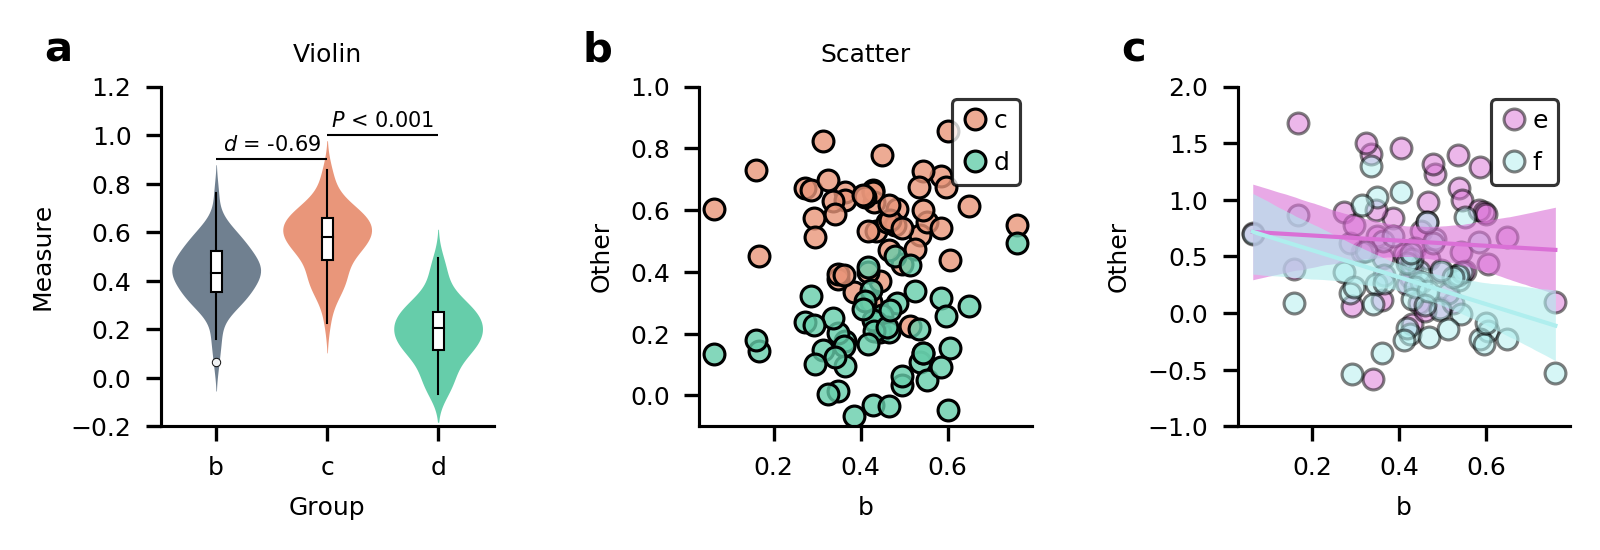

In [75]:
fig, axs = plt.subplots(1, 3, figsize=utilities.cm2inch(3*4.5, 4.5))

# Violin Plot
axs[0] = violin(data[['b', 'c', 'd']], value_name='Measure', ax=axs[0])
axs[0].set_ylim(-0.2, 1.2)
axs[0].set_yticks(np.arange(-0.2, 1.21, 0.2))
axs[0].set_title('Violin')

# Annotations
d = np.mean(data['b']) - np.mean(data['c']) / np.sqrt(np.std(data['b']**2) + np.std(data['c']**2))
axs[0] = hTextLine('$d$ = {d:.2f}'.format(d=d), 0, 1, 0.9, ax=axs[0], lineTextGap=0.02)

tval, pval = ttest_ind(data['c'], data['b'], equal_var=False)
if pval < 0.001:
    pstring = "$P$ < 0.001"
else:
    pstring = '$P$ = {pval:.4f}'.format(pval=pval)
axs[0] = hTextLine(pstring, 1, 2, 1, lineTextGap=0.02, ax=axs[0])

# Scatter Plot
axs[1].plot([]) # skip first color so that relations of colors to variables are constant
axs[1] = scatter(data['b'], data['c'], label='c', ax=axs[1])
axs[1] = scatter(data['b'], data['d'], label='d', ax=axs[1])
axs[1].set_ylim(-0.1, 1)
axs[1].set_xlabel('b')
axs[1].set_ylabel('Other')
axs[1].legend()
axs[1].set_title('Scatter')


# LM Plot
for i in range(4):
    axs[2].plot([]) # skip first colors so that relations of colors to variables are constant

lmout1 = lm(data['b'], data['e'], label='e', ax=axs[2])
lmout2 = lm(data['b'], data['f'], label='f', ax=axs[2])
axs[2].set_xlabel('b')
axs[2].set_ylabel('Other')
axs[2].legend()
axs[2].set_ylim(-1, 2)
axs[2].set_yticks(np.arange(-1, 2.01, 0.5))

# Labelling
fig.tight_layout(w_pad=3)
utilities.label_axes(fig, fontsize=10, loc=(-0.35, 1.05), fontweight='bold', ha='left', va='bottom')